# Instacart Market Basket Analysis

## Importing the required libraries

In [1]:
# Import the libraries you'll need for this analysis
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
# Note: These files use semicolon (;) as the separator instead of comma
orders         = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products       = pd.read_csv('/datasets/products.csv', sep=';')
departments    = pd.read_csv('/datasets/departments.csv', sep=';')
aisles         = pd.read_csv('/datasets/aisles.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

## Analyze your data

In the cells below, display the datasets using `.info()` and `.head()` to gain insights into their structure and content.

- `.info()`: Provides a concise summary of the dataset, including the data types, non-null counts, and memory usage.
- `.head()`: Displays the first few rows of the dataset, offering a quick overview of the data values.

In [3]:
# In this cell, type "orders" below this line and execute the cell
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [4]:
# In this cell, type "products" below this line and execute the cell
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Repeat this process for each dataset to understand the structure, including the types of columns and rows they contain. Add additional code cells as needed for your analysis.

In [5]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [7]:
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [8]:
# In this cell, type "orders.info() below this line and execute the cell
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


The "Non-Null Count" column provides information about any missing values in each column of the dataset. With a total of 478,952 entries, observe any columns where the non-null count is less than this number to identify missing values.

In [9]:
# In this cell, run orders_products.info() below, but include the argument show_counts=True since this is a large file.
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Repeat the use of .info() on the remaining datasets to identify missing values and understand their structure. Check the "Non-Null Count" for each dataset to spot any columns with missing values.

In [10]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [11]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


## Find and Remove Missing Values

We noticed that some columns contain missing values.

Here are some useful code snippets:

```python
# Identify missing values in each column
print(dataset.isnull().sum())

# Display rows where a specific column has missing values
print(dataset[dataset['column_name'].isna()])

# Confirm no missing values remain
print(dataset.isnull().sum())
```

In [14]:
# Identify missing values in each column
print(orders.isnull().sum())

# Display rows where a specific column has missing values
print(orders[orders['order_id'].isna()])
print(orders[orders['user_id'].isna()])
print(orders[orders['order_number'].isna()])
print(orders[orders['order_dow'].isna()])
print(orders[orders['order_hour_of_day'].isna()])
print(orders[orders['days_since_prior_order'].isna()])

# Confirm no missing values remain
print(orders.isnull().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685         

### `products` Data Frame

We will begin by addressing the missing values in the `products` data frame.

In [15]:
# Display rows where the product_name column has missing values
# Identify missing values in each column
print(products.isnull().sum())

# Display rows where a specific column has missing values
print(products[products['product_id'].isna()])
print(products[products['product_name'].isna()])
print(products[products['aisle_id'].isna()])
print(products[products['department_id'].isna()])

# Confirm no missing values remain
print(products.isnull().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
Empty DataFrame
Columns: [pr

It seems suspicious that all rows with missing `product_name` might be associated with `aisle_id` 100 and `department_id` 21. Let’s verify this by checking if any rows with missing `product_name` have an `aisle_id` different from 100 and 21. This will help us confirm if the issue is isolated to this aisle or spread across others.

In [16]:
# Filter rows where product_name is missing
missing_names = products[products['product_name'].isna()]

# Check for any rows where aisle_id != 100 or department_id != 21
suspicious_rows = missing_names[(missing_names['aisle_id'] != 100) | (missing_names['department_id'] != 21)]

# Display the result
print(suspicious_rows)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [17]:
# Combine conditions to check for missing product names in aisles other than 21
# Filter rows with missing product_name and department_id not equal to 21
suspicious_rows = products[products['product_name'].isna() & (products['department_id'] != 21)]

# Display the result
print(suspicious_rows)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


To better understand the missing product_name values, let’s determine what department_id 21 and aisle_id 100 represent by referencing the departments and aisles tables.

In [18]:
# What is this aisle and department?
# Lookup department name for department_id 21
dept_21 = departments[departments['department_id'] == 21]
print(dept_21)

# Lookup aisle name for aisle_id 100
aisle_100 = aisles[aisles['aisle_id'] == 100]
print(aisle_100)

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


In [19]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

print(products['product_name'].isna().sum())  # Should print 0
# Student Answer:
# Reasoning: These products had no name information but retained valid IDs, aisles and departments data.
# Replacing these NA's with 'Unknown' preserves their presence in the dataset for analysis (reorder trends, cart position, etc)
# without discarding potentially useful information. Dropping them might bias results if these rows are meaningful.

0


### `orders` data frame

Now let's fill in missing values from the `orders` table.

In [20]:
# Display rows where the days_since_prior_order column has missing values
# Identify missing values in each column
print(orders[orders['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [21]:
# Find rows where days_since_prior_order is missing but it's NOT the customer's first order
suspicious_orders = orders[orders['days_since_prior_order'].isna() & (orders['order_number'] != 1)]

# Display results
print(suspicious_orders)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


All of the missing `'days_since_prior_order'` values correspond to a customer's first ever order. This makes sense because there is no prior order! We'll leave the values as `NaN` so the column can remain numeric. Also, the `NaN` values shouldn't interfere with any calculations we might do using this column.

### `order_products` data frame

Now let's fill in missing values from the order_products table.

In [22]:
# Display rows where the add_to_cart_order column has missing values
print(order_products[order_products['add_to_cart_order'].isna()])


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [23]:
# Use .min() and .max() to find the minimum and maximum values for this column.
# Display min and max of the column (excluding NaNs)
print("Min:", order_products['add_to_cart_order'].min())
print("Max:", order_products['add_to_cart_order'].max())

Min: 1.0
Max: 64.0


In [24]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# Find order_ids with missing add_to_cart_order values
order_ids_with_missing_cart_order = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

# Optionally convert to list and print
print(order_ids_with_missing_cart_order)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [25]:
# Do all orders with missing values have more than 64 products?
# Get order_ids with missing add_to_cart_order
missing_orders = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

# Count number of products per order for these orders
product_counts = order_products[order_products['order_id'].isin(missing_orders)] \
                    .groupby('order_id')['product_id'].count()

# Check if all these orders have more than 64 products
all_over_64 = (product_counts > 64).all()
print("All orders with missing values have more than 64 products:", all_over_64)

# Optionally, inspect counts
print(product_counts.describe())

All orders with missing values have more than 64 products: True
count     70.000000
mean      75.942857
std       12.898585
min       65.000000
25%       67.000000
50%       71.000000
75%       78.000000
max      127.000000
Name: product_id, dtype: float64


In [26]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

For some reason, any item placed in the cart 65th or later has a missing value in the `'add_to_cart_order'` column. Maybe the data type of that column in the database could only hold integer values from 1 to 64. We've decided to replace the missing values with a code value, 999, that represents an unknown placed in cart order above 64. We also converted the column to integer data type. We just need to be careful to remember this if we perform calculations using this column during our analysis.

Other sensible code values we could've used are 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

Also note that, for orders with exactly 65 items, we could replace the missing value with 65. But we're going to neglect that for now since we can't determine the 65th item for all orders with 66 items or more.

## Find and Remove Duplicate Values from All the Datasets

Each dataset may contain duplicate rows, which can lead to redundancy and affect the accuracy of our analysis. To handle this:

1. Use the `.duplicated()` method to identify duplicate rows. This method returns a Boolean series where `True` indicates a duplicate row.
2. Apply the `.drop_duplicates()` method to remove these duplicate rows, ensuring a cleaner dataset.
3. Optionally, you can set the `keep` parameter in `.drop_duplicates()` to specify which duplicate to retain (`'first'` or `'last'`).

Here is some example code for reference:
```python
# Check for duplicates
print(dataset.duplicated().sum())  # Number of duplicate rows

# View duplicate rows
print(dataset[dataset.duplicated()]

# Remove duplicates
dataset = dataset.drop_duplicates().reset_index(drop=True)

# Confirm removal
print(dataset.duplicated().sum())  # Should return 0
```

Repeat this process for all datasets to ensure they are free of duplicate rows.

### `orders` data frame

In [27]:

# Find the number of duplicate rows in the orders dataframe
print("Duplicate orders (full rows):", orders.duplicated().sum())


Duplicate orders (full rows): 15


In [28]:

# View the duplicate rows
print(orders[orders.duplicated()])


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [29]:
# Remove duplicate orders
orders = orders.drop_duplicates().reset_index(drop=True)

In [30]:
# Double check for duplicate rows
print("Duplicates after cleaning:", orders.duplicated().sum())

Duplicates after cleaning: 0


In [31]:
# Student Answer:
# Check how many orders were placed on Wednesday at 2:00AM
wednesday_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

print("Number of orders placed on Wednesday at 2:00AM:", len(wednesday_2am_orders))

# Optional: Inspect them
print(wednesday_2am_orders.head())
# Reason: This check helps identify any unusual ordering patterns or timestamp anomalies after duplicate removal.
# For example, 2AM orders might indicate automated scheduling, test data, or outliers that need further review.

Number of orders placed on Wednesday at 2:00AM: 106
       order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838    2766110   162084            41          3                  2   
5156    2190225   138285            18          3                  2   
15506    553049    58599            13          3                  2   
18420    382357   120200            19          3                  2   
24691    690242    77357             2          3                  2   

       days_since_prior_order  
4838                     16.0  
5156                     11.0  
15506                     7.0  
18420                    11.0  
24691                     9.0  


### `products` data frame

In [32]:

# Check for fully duplicate rows
print("Fully duplicate product rows:", products.duplicated().sum())
print(products[products.duplicated()])


Fully duplicate product rows: 0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [33]:
# Check for just duplicate product IDs using subset='product_id' in duplicated()
print("Duplicate product_id entries:", products.duplicated(subset='product_id').sum())
print(products[products.duplicated(subset='product_id')])

Duplicate product_id entries: 0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Hint: To identify duplicate product names more effectively, convert the names to lowercase for consistent comparison. Use the .str.lower() method on the product_name column to standardize the text before checking for duplicates.

In [34]:
# Check for just duplicate product names (convert names to lowercase to compare better)
# Create a lowercase name column temporarily
products['product_name_lower'] = products['product_name'].str.lower()

# Find duplicates based on lowercase names
print("Duplicate product_name (case-insensitive):", products.duplicated(subset='product_name_lower').sum())
print(products[products.duplicated(subset='product_name_lower')])

# Drop the helper column afterward
products.drop(columns='product_name_lower', inplace=True)

Duplicate product_name (case-insensitive): 1361
       product_id                                     product_name  aisle_id  \
71             72                                          Unknown       100   
109           110                                          Unknown       100   
296           297                                          Unknown       100   
416           417                                          Unknown       100   
436           437                                          Unknown       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE      

Let's see what that looks like in our dataset :

In [35]:
products[products['product_name'].str.lower() == 'high performance energy drink']

,product_id,product_name,aisle_id,department_id
22540,22541,High Performance Energy Drink,64,7
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7


In [88]:
# Find case-insensitive duplicates, excluding Unknown
mask_lower = products['product_name'].str.lower().duplicated(keep=False)
duplicates = products[(products['product_name'].notna()) & (products['product_name'] != 'Unknown') & mask_lower]
duplicates = duplicates[['product_id', 'product_name', 'aisle_id', 'department_id']].sort_values(by='product_name')
print("Number of duplicate product names (excluding missing):", duplicates.shape[0])
print(duplicates)

Number of duplicate product names (excluding missing): 0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


### `departments` data frame

In [39]:
# Student Answer: Check for duplicate entries in the departments dataframe
print("=== DEPARTMENTS DATAFRAME ===")
print("Full row duplicates:")
dept_full_duplicates = departments[departments.duplicated()]
print(f"Number of full row duplicates: {len(dept_full_duplicates)}")
print(dept_full_duplicates)

print("\nDuplicate department_id values:")
dept_id_duplicates = departments[departments.duplicated(subset=['department_id'], keep=False)]
print(f"Number of duplicate department_id values: {len(dept_id_duplicates)}")
print(dept_id_duplicates)

print("\n" + "="*50 + "\n")


=== DEPARTMENTS DATAFRAME ===
Full row duplicates:
Number of full row duplicates: 0
Empty DataFrame
Columns: [department_id, department]
Index: []

Duplicate department_id values:
Number of duplicate department_id values: 0
Empty DataFrame
Columns: [department_id, department]
Index: []




### `aisles` data frame

In [40]:

# Student Answer: Check for duplicate entries in the aisles dataframe
print("=== AISLES DATAFRAME ===")
print("Full row duplicates:")
aisle_full_duplicates = aisles[aisles.duplicated()]
print(f"Number of full row duplicates: {len(aisle_full_duplicates)}")
print(aisle_full_duplicates)

print("\nDuplicate aisle_id values:")
aisle_id_duplicates = aisles[aisles.duplicated(subset=['aisle_id'], keep=False)]
print(f"Number of duplicate aisle_id values: {len(aisle_id_duplicates)}")
print(aisle_id_duplicates)

print("\n" + "="*50 + "\n")


=== AISLES DATAFRAME ===
Full row duplicates:
Number of full row duplicates: 0
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Duplicate aisle_id values:
Number of duplicate aisle_id values: 0
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []




### `order_products` data frame

In [41]:
# Student Answer: Check for duplicate entries in the order_products dataframe
print("=== ORDER_PRODUCTS DATAFRAME ===")
print("Full row duplicates:")
order_prod_full_duplicates = order_products[order_products.duplicated()]
print(f"Number of full row duplicates: {len(order_prod_full_duplicates)}")
print(order_prod_full_duplicates)

# For order_products, we might also want to check for duplicate combinations
# of order_id and product_id (which should be unique pairs)
print("\nDuplicate (order_id, product_id) combinations:")
order_prod_key_duplicates = order_products[order_products.duplicated(subset=['order_id', 'product_id'], keep=False)]
print(f"Number of duplicate (order_id, product_id) combinations: {len(order_prod_key_duplicates)}")
print(order_prod_key_duplicates.head(10))  # Show first 10 if many

print("\n" + "="*50 + "\n")


=== ORDER_PRODUCTS DATAFRAME ===
Full row duplicates:
Number of full row duplicates: 0
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

Duplicate (order_id, product_id) combinations:
Number of duplicate (order_id, product_id) combinations: 0
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []




In [42]:
# Summary statistics
print("=== SUMMARY ===")
print(f"Departments - Total rows: {len(departments)}, Unique department_ids: {departments['department_id'].nunique()}")
print(f"Aisles - Total rows: {len(aisles)}, Unique aisle_ids: {aisles['aisle_id'].nunique()}")
print(f"Order_products - Total rows: {len(order_products)}, Unique (order_id, product_id) pairs: {order_products[['order_id', 'product_id']].drop_duplicates().shape[0]}")

=== SUMMARY ===
Departments - Total rows: 21, Unique department_ids: 21
Aisles - Total rows: 134, Unique aisle_ids: 134
Order_products - Total rows: 4545007, Unique (order_id, product_id) pairs: 4545007


We have now successfully cleaned our data. Let's begin our exploratory data analysis.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

To verify that the values in the `order_hour_of_day` and `order_dow` columns are sensible:

1. **Check unique values**: Use `.unique()` on each column to extract all distinct values present.
2. **Sort the results**: Use `sorted()` to arrange the unique values in ascending order for easier verification.
3. **Validate ranges**:
   - Ensure `order_hour_of_day` values range from 0 to 23 (representing hours of the day).
   - Ensure `order_dow` values range from 0 to 6 (representing days of the week).

This process confirms that the data aligns with expected ranges and there are no out-of-bound or invalid entries.

In [43]:
# Check unique values in 'order_hour_of_day'
unique_hours = sorted(orders['order_hour_of_day'].unique())
print("Unique order hours:", unique_hours)

Unique order hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [44]:
# Check unique values in 'order_dow'
unique_days = sorted(orders['order_dow'].unique())
print("Unique order days of week:", unique_days)

Unique order days of week: [0, 1, 2, 3, 4, 5, 6]


### [A2] What time of day do people shop for groceries?

To determine the time of day people shop for groceries, analyze the order_hour_of_day column in the orders dataset. Use .value_counts() to count the number of orders placed at each hour, and then sort the results by the hour for a clear chronological order.

Finally, visualize the data with a bar plot to easily observe the shopping trends across different times of the day.

In [45]:
# Count number of orders by hour
hourly_orders = orders['order_hour_of_day'].value_counts().sort_index()
print(hourly_orders)

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


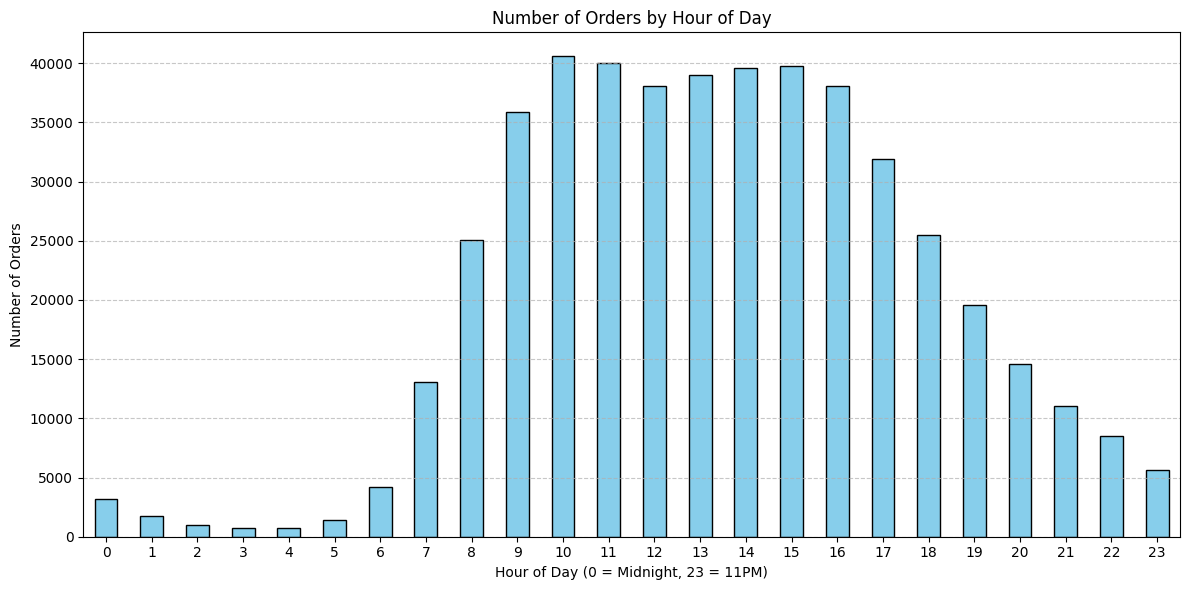

In [46]:
# Create bar plot
plt.figure(figsize=(12, 6))
hourly_orders.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11PM)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most orders occur between 9:00 AM and 5:00 PM, with peaks at 10:00 AM and 3:00 PM

### [A3] What day of the week do people shop for groceries?

To figure out what day of the week people shop for groceries, analyze the order_dow column in the orders dataset. Use .value_counts() to count the number of orders for each day of the week, and then sort the results by the day index to maintain the correct order.

Visualize the data with a bar plot to clearly observe shopping patterns across the days of the week.

In [47]:
# Count orders per day of the week and sort by day index
#0 = Sunday, 6 = Saturday
dow_counts = orders['order_dow'].value_counts().sort_index()
print(dow_counts)

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


The data dictionary does not state which integer corresponds to which day of the week. Assuming Sunday = 0, then people place more orders at the beginning of the week (Sunday and Monday).

### [A4] How long do people wait until placing another order?

To understand how long people wait before placing another order, analyze the days_since_prior_order column in the orders dataset. Use .value_counts() to count how many orders were placed for each interval of days, then sort the results by the number of days for clarity.

Visualize the data using a bar plot to observe patterns in ordering frequency over time.

=== CUSTOMER REORDER INTERVAL ANALYSIS ===
Total orders in dataset: 478,952
Missing values in days_since_prior_order: 28,817

=== BASIC STATISTICS ===
count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

=== FREQUENCY ANALYSIS ===
Top 20 most common reorder intervals:
0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
Name: days_since_prior_order, dtype: int64

Top 10 intervals by percentage:
0.0    2.13
1.0    4.48
2.0    6.03
3.0    6.71
4.0    6.89
5.0    6.69
6.0    7.54
7.0    9.90
8.0    5.63
9.0    3.72
Name: days_since_prior_order, dtype: float64

=== KEY PATTERNS ===
Orders plac

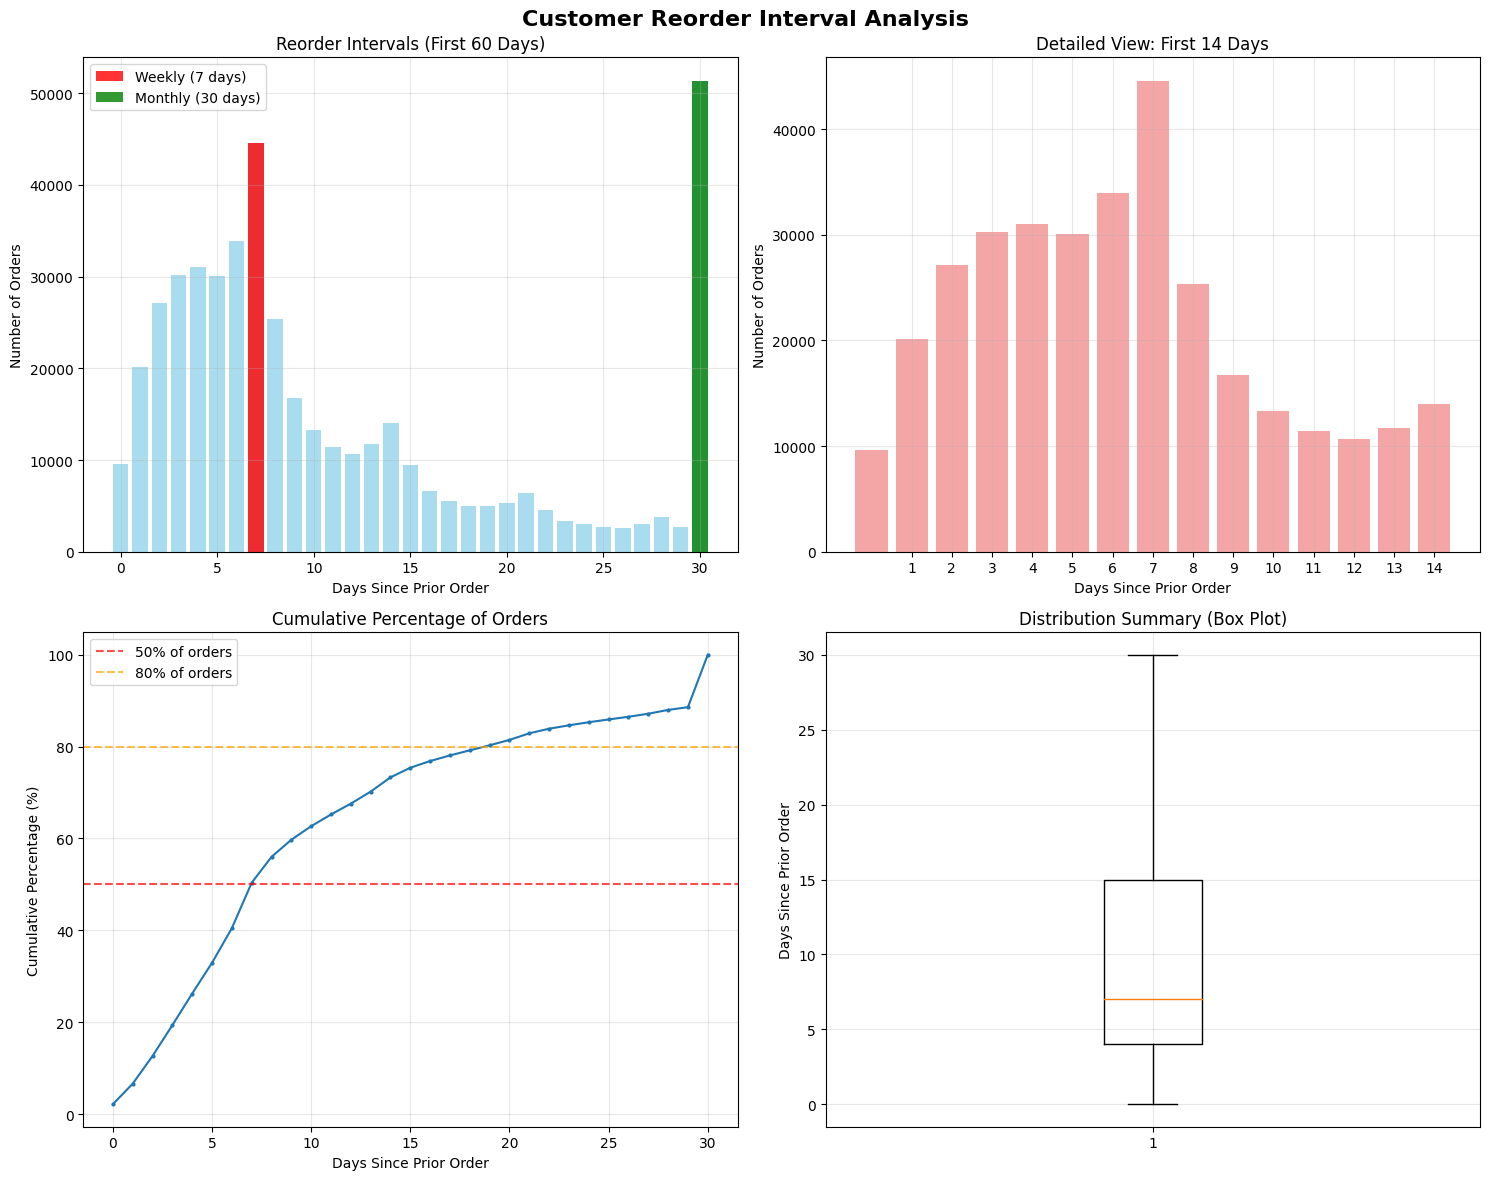


=== BUSINESS INSIGHTS ===
Median reorder interval: 7.0 days
Customers who reorder within a week: 50.4%
Customers who reorder within a month: 100.0%
Most common reorder interval: 30.0 days (51,337 orders)

=== CUSTOMER BEHAVIOR PATTERNS ===
Based on the analysis:
• Weekly shopping patterns (7-day intervals)
• Quick replenishment orders (1-3 days)
• Monthly bulk shopping (30-day intervals)
• Individual shopping habits and preferences


In [48]:
# Student Answers:
import seaborn as sns

# Step 1: Analyze the days_since_prior_order column
print("=== CUSTOMER REORDER INTERVAL ANALYSIS ===")
print(f"Total orders in dataset: {len(orders):,}")

# Check for missing values first
missing_values = orders['days_since_prior_order'].isna().sum()
print(f"Missing values in days_since_prior_order: {missing_values:,}")

# Basic statistics
print("\n=== BASIC STATISTICS ===")
print(orders['days_since_prior_order'].describe())

# Step 2: Count frequencies and sort by days
print("\n=== FREQUENCY ANALYSIS ===")
days_counts = orders['days_since_prior_order'].value_counts().sort_index()
print("Top 20 most common reorder intervals:")
print(days_counts.head(20))

# Calculate percentages
days_percentages = (days_counts / days_counts.sum() * 100).round(2)
print("\nTop 10 intervals by percentage:")
print(days_percentages.head(10))

# Step 3: Identify key patterns
print("\n=== KEY PATTERNS ===")
# Weekly pattern (day 7)
weekly_orders = days_counts.get(7, 0)
print(f"Orders placed exactly 7 days apart (weekly): {weekly_orders:,} ({(weekly_orders/days_counts.sum()*100):.1f}%)")

# Monthly pattern (around day 30)
monthly_orders = days_counts.get(30, 0)
print(f"Orders placed exactly 30 days apart (monthly): {monthly_orders:,} ({(monthly_orders/days_counts.sum()*100):.1f}%)")

# Quick reorders (1-3 days)
quick_reorders = days_counts[days_counts.index <= 3].sum()
print(f"Quick reorders (1-3 days): {quick_reorders:,} ({(quick_reorders/days_counts.sum()*100):.1f}%)")

# Step 4: Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Customer Reorder Interval Analysis', fontsize=16, fontweight='bold')

# Plot 1: Full distribution (first 60 days)
days_counts_limited = days_counts[days_counts.index <= 60]
axes[0, 0].bar(days_counts_limited.index, days_counts_limited.values, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Reorder Intervals (First 60 Days)')
axes[0, 0].set_xlabel('Days Since Prior Order')
axes[0, 0].set_ylabel('Number of Orders')
axes[0, 0].grid(True, alpha=0.3)

# Highlight weekly pattern
if 7 in days_counts_limited.index:
    axes[0, 0].bar(7, days_counts_limited[7], color='red', alpha=0.8, label='Weekly (7 days)')
if 30 in days_counts_limited.index:
    axes[0, 0].bar(30, days_counts_limited[30], color='green', alpha=0.8, label='Monthly (30 days)')
axes[0, 0].legend()

# Plot 2: Focus on first 14 days (detailed view)
days_counts_detail = days_counts[days_counts.index <= 14]
axes[0, 1].bar(days_counts_detail.index, days_counts_detail.values, alpha=0.7, color='lightcoral')
axes[0, 1].set_title('Detailed View: First 14 Days')
axes[0, 1].set_xlabel('Days Since Prior Order')
axes[0, 1].set_ylabel('Number of Orders')
axes[0, 1].set_xticks(range(1, 15))
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Cumulative percentage
cumulative_pct = (days_counts.cumsum() / days_counts.sum() * 100)
axes[1, 0].plot(cumulative_pct.index[:60], cumulative_pct.values[:60], marker='o', markersize=2)
axes[1, 0].set_title('Cumulative Percentage of Orders')
axes[1, 0].set_xlabel('Days Since Prior Order')
axes[1, 0].set_ylabel('Cumulative Percentage (%)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% of orders')
axes[1, 0].axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80% of orders')
axes[1, 0].legend()

# Plot 4: Box plot for distribution summary
orders_with_days = orders.dropna(subset=['days_since_prior_order'])
axes[1, 1].boxplot(orders_with_days['days_since_prior_order'], vert=True)
axes[1, 1].set_title('Distribution Summary (Box Plot)')
axes[1, 1].set_ylabel('Days Since Prior Order')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 5: Business insights
print("\n=== BUSINESS INSIGHTS ===")

# Find median reorder time
median_days = orders['days_since_prior_order'].median()
print(f"Median reorder interval: {median_days} days")

# Find what percentage of customers reorder within a week
within_week = (days_counts[days_counts.index <= 7].sum() / days_counts.sum() * 100)
print(f"Customers who reorder within a week: {within_week:.1f}%")

# Find what percentage of customers reorder within a month
within_month = (days_counts[days_counts.index <= 30].sum() / days_counts.sum() * 100)
print(f"Customers who reorder within a month: {within_month:.1f}%")

# Identify the most common reorder interval
most_common_interval = days_counts.idxmax()
most_common_count = days_counts.max()
print(f"Most common reorder interval: {most_common_interval} days ({most_common_count:,} orders)")

print("\n=== CUSTOMER BEHAVIOR PATTERNS ===")
print("Based on the analysis:")
print("• Weekly shopping patterns (7-day intervals)")
print("• Quick replenishment orders (1-3 days)")  
print("• Monthly bulk shopping (30-day intervals)")
print("• Individual shopping habits and preferences")

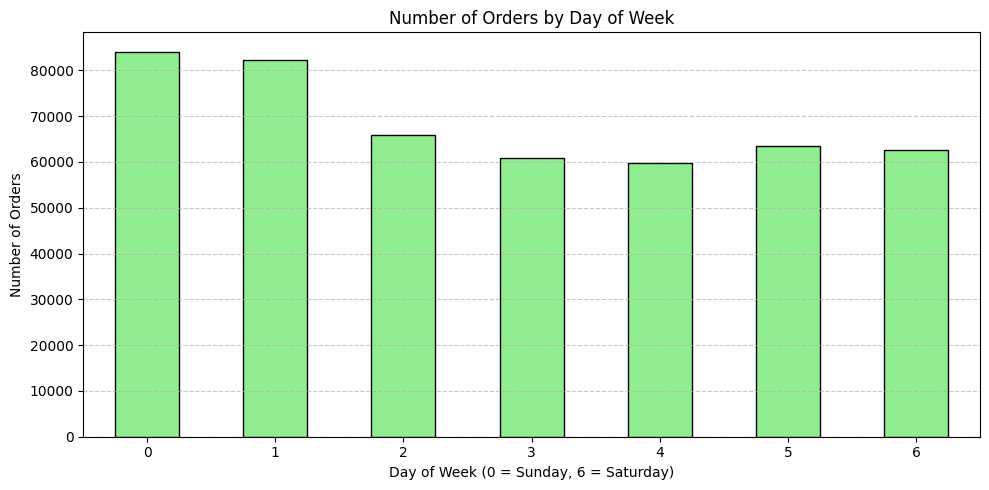

In [49]:
plt.figure(figsize=(10, 5))
dow_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The 0 values probably correspond to customers who placed more than one order on the same day.

The max value of 30 days and the high spike at that value is puzzling though. The spike might be explained by people who set up recurring subscriptions to automatically order once a month. But that doesn't explain why there are no values above 30 days. I would expect many customers to place orders less often than once a month. Maybe those customers were intentionally excluded from the dataset.

Disregarding the spike at 30 days, most people wait between 2 to 10 days in between orders. The most common wait time is 7 days. In other words, it's common for people to place weekly grocery orders. Interestingly, in the tail of the distribution we also see small spikes at 14, 21, and 28 days. These would correspond to orders every 2, 3, or 4 weeks.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the bar charts for both days and describe the differences that you see.

To determine if there's a difference in the `order_hour_of_day` distributions on Wednesdays and Saturdays, follow these steps:

1. **Create masks** for Wednesday (`order_dow == 3`) and Saturday (`order_dow == 6`) to filter the orders data.
2. **Count the order hours** for each day using `.value_counts()` and sort them by hour with `.sort_index()` for clarity.
3. **Combine the counts** for both days into a single DataFrame using `pd.concat()`, and label the columns for easier interpretation.

After preparing the data, plot bar charts for both days to visually compare the distribution of order times. Look for patterns such as peaks or differences in the busiest times throughout the day.

# Wednesday (order_dow == 3), Saturday (order_dow == 6)
wednesday_orders = orders[orders['order_dow'] == 3]
saturday_orders = orders[orders['order_dow'] == 6]

In [50]:
# Count orders per hour for each day
wednesday_orders = orders[orders['order_dow'] == 3] 
saturday_orders = orders[orders['order_dow'] == 6]
wed_hour_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
sat_hour_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

In [51]:
# Combine into one DataFrame for easier plotting
hourly_comparison = pd.concat([wed_hour_counts, sat_hour_counts], axis=1)
hourly_comparison.columns = ['Wednesday', 'Saturday']
hourly_comparison = hourly_comparison.fillna(0).astype(int)

<Figure size 1400x600 with 0 Axes>

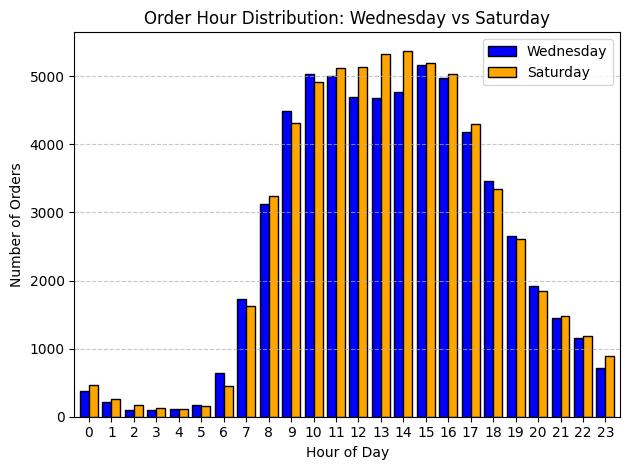

In [52]:
plt.figure(figsize=(14, 6))
hourly_comparison.plot(kind='bar', width=0.8, color=['blue', 'orange'], edgecolor='black')
plt.title('Order Hour Distribution: Wednesday vs Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There's a small dip from 11h to 13h on Wednesdays. This dip is absent on Saturdays. Maybe this dip can be attributed to people who don't use Instacart because they have lunch somewhere between 11h and 13h.

### [B2] What's the distribution for the number of orders per customer?

To explore the distribution of the number of orders per customer:

1. **Group the data** by `user_id` to calculate the total number of orders for each customer. Use `.groupby('user_id')` and count the `order_id` for each group.
2. **Sort the results** using `.sort_values()` for better readability.
3. **Visualize the distribution** using a histogram to observe how many orders most customers typically place.

Adjust the number of bins in the histogram to refine the visualization and better capture the pattern.

In [53]:
# Count number of orders per customer
orders_per_customer = orders.groupby('user_id')['order_id'].count()

# Sorting the results
orders_per_customer = orders_per_customer.sort_values(ascending=False)

# Preview
print(orders_per_customer.describe())


count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_id, dtype: float64


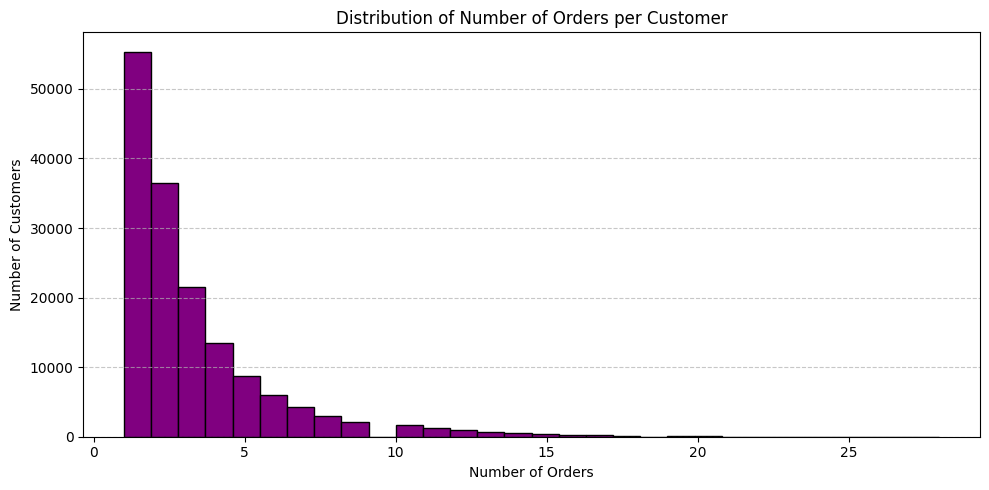

In [54]:
plt.figure(figsize=(10, 5))
plt.hist(orders_per_customer, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most customers in the dataset have placed between 1 and 10 orders, with number of orders per customer sharply decreasing after just 1 order.

### [B3] What are the top 20 popular products (display their id and name)?

To identify the top 20 most popular products:

1. **Merge the datasets**: Combine `order_products` and `products` on `product_id` to access both the product IDs and names in a single DataFrame.
2. **Group the data**: Group by both `product_id` and `product_name` to aggregate the order counts for each product using `.size()`.
3. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their popularity.
4. **Display the top 20**: Use `.head(20)` to focus on the most frequently ordered products.
5. **Visualize the results**: Create a bar chart to highlight the top products and their order counts.

This will give you a clear view of the most popular products and their ranking.


In [55]:
# Merge to get product names alongside order data
merged = order_products.merge(products, on='product_id', how='inner')

In [56]:
# Count number of times each product was ordered
product_counts = merged.groupby(['product_id', 'product_name']).size().reset_index(name='order_count')

# Sort by most ordered
top_products = product_counts.sort_values('order_count', ascending=False).head(20)
print(top_products)

       product_id              product_name  order_count
22310       24852                    Banana        66050
11767       13176    Bag of Organic Bananas        53297
18953       21137      Organic Strawberries        37039
19643       21903      Organic Baby Spinach        33971
42277       47209      Organic Hass Avocado        29773
42778       47766           Organic Avocado        24689
42654       47626               Large Lemon        21495
15029       16797              Strawberries        20018
23522       26209                     Limes        19690
24995       27845        Organic Whole Milk        19600
25102       27966       Organic Raspberries        19197
20572       22935      Organic Yellow Onion        15898
22409       24964            Organic Garlic        15292
40301       45007          Organic Zucchini        14584
35196       39275       Organic Blueberries        13879
44510       49683            Cucumber Kirby        13675
25318       28204        Organi

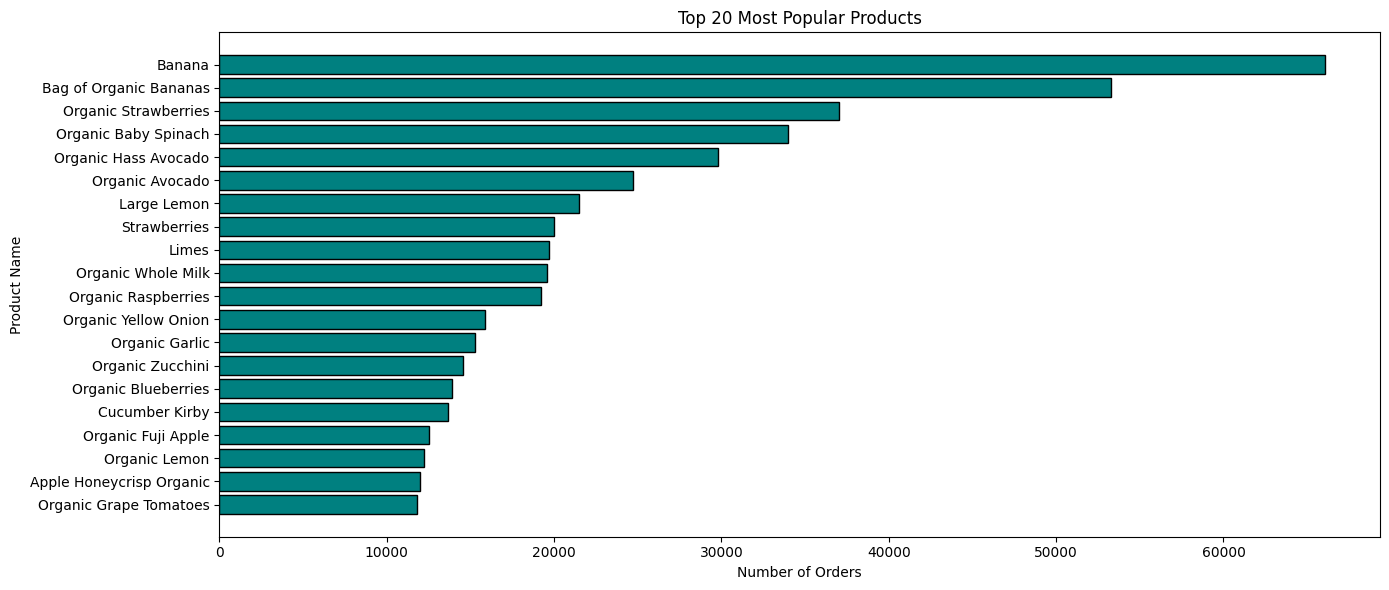

In [57]:
plt.figure(figsize=(14, 6))
plt.barh(top_products['product_name'], top_products['order_count'], color='teal', edgecolor='black')
plt.title('Top 20 Most Popular Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.gca().invert_yaxis() # Most popular at the top
plt.tight_layout()
plt.show()

The top 20 items are all produce, except for the milk. Looks like people want delicious and nutritious!

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?
To analyze how many items people typically buy in one order:

1. **Group the data** by `order_id` and count the number of products (`product_id`) in each order using `.count()`. This gives the number of items in each order.
2. **Aggregate the counts**: Use `.value_counts()` to determine how frequently different order sizes occur, and then sort the results with `.sort_index()` to organize by the number of items.
3. **Visualize the distribution**: Use a bar plot to show the frequency of orders for each size, with the x-axis representing the number of items and the y-axis representing the number of orders.

This will help you understand the typical size of a grocery order and identify any trends in purchasing behavior.

In [58]:
# Count number of products in each order
items_per_order = order_products.groupby('order_id')['product_id'].count()

# Preview statistics
print(items_per_order.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


In [59]:
order_size_distribution = items_per_order.value_counts().sort_index()
order_size_distribution.head(10) # first 10 order sizes

1     21847
2     26292
3     29046
4     31054
5     31923
6     31698
7     30822
8     28539
9     25742
10    23248
Name: product_id, dtype: int64

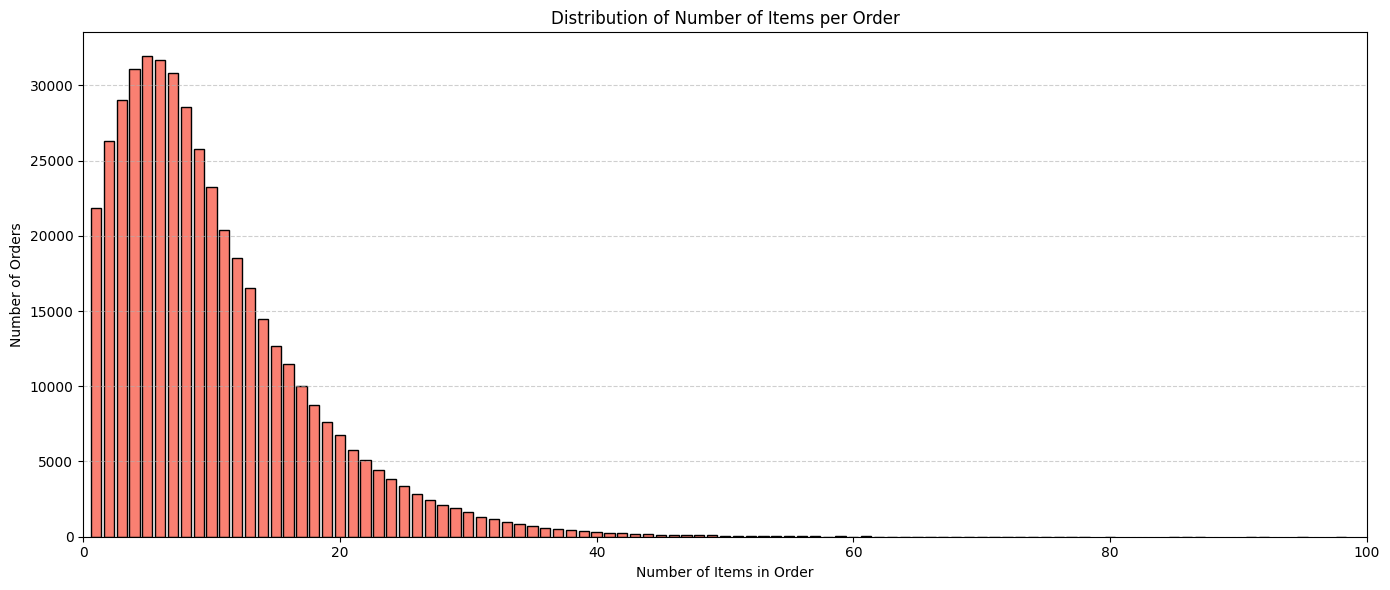

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.bar(order_size_distribution.index, order_size_distribution.values, color='salmon', edgecolor='black')
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlim(0, 100)  # Adjust x-axis if you want to focus on typical ranges
plt.tight_layout()
plt.show()

Most of the order numbers are in the tail of the distribution. To get a better look at the non-tail part, let's choose a value in the tail as a cutoff and just plot order with fewer than that many items. An order size of 35 items is far enough into the tail for this.

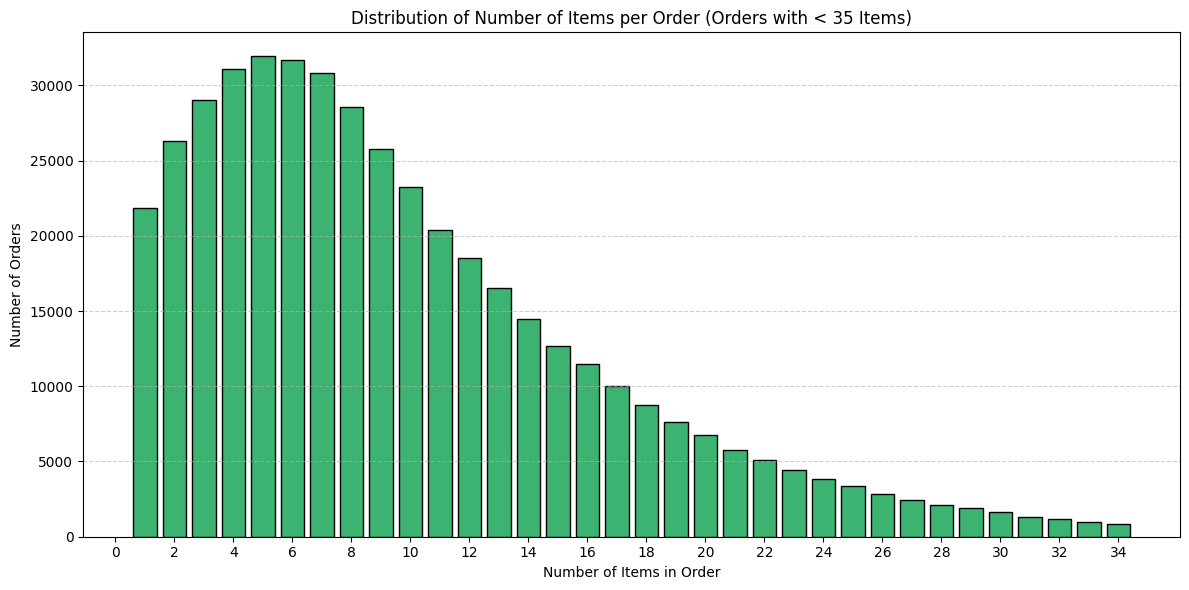

In [61]:
# Keep only orders with fewer than 35 items
filtered_items = items_per_order[items_per_order < 35]

# Count frequency of each order size
filtered_distribution = filtered_items.value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(filtered_distribution.index, filtered_distribution.values, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Number of Items per Order (Orders with < 35 Items)')
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 36, 2))  # Tick every 2 items
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The typical order contains 5 or 6 items, with most orders having between 1 and 20 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

To find the top 20 most frequently reordered items:

1. **Filter the data**: Use `order_products['reordered'] == 1` to isolate only the products that have been reordered.
2. **Merge the datasets**: Combine the filtered `order_products` with the `products` dataset on `product_id` to get both the product names and IDs.
3. **Group the data**: Group by both `product_id` and `product_name` to calculate how many times each product was reordered, using `.size()`.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank the products by reorder frequency.
5. **Display the top 20**: Use `.head(20)` to focus on the most frequently reordered products.
6. **Visualize the data**: Create a bar chart to showcase the top reordered items and their frequencies.

This process highlights the products that customers consistently return to and reorder.

In [62]:
# Filter only rows where the product was reordered
reordered_items = order_products[order_products['reordered'] == 1]

In [63]:
# Merge with products to get product_name
reordered_merged = reordered_items.merge(products, on='product_id', how='inner')

In [64]:
# Count how many times each product was reordered
reorder_counts = reordered_merged.groupby(['product_id', 'product_name']).size().reset_index(name='reorder_count')

# Sort in descending order
top_reordered = reorder_counts.sort_values('reorder_count', ascending=False).head(20)
print(top_reordered)

       product_id              product_name  reorder_count
17816       24852                    Banana          55763
9377        13176    Bag of Organic Bananas          44450
15122       21137      Organic Strawberries          28639
15682       21903      Organic Baby Spinach          26233
33856       47209      Organic Hass Avocado          23629
34266       47766           Organic Avocado          18743
19970       27845        Organic Whole Milk          16251
34163       47626               Large Lemon          15044
20058       27966       Organic Raspberries          14748
12001       16797              Strawberries          13945
18789       26209                     Limes          13327
16433       22935      Organic Yellow Onion          11145
17898       24964            Organic Garlic          10411
32277       45007          Organic Zucchini          10076
35635       49683            Cucumber Kirby           9538
20222       28204        Organic Fuji Apple           89

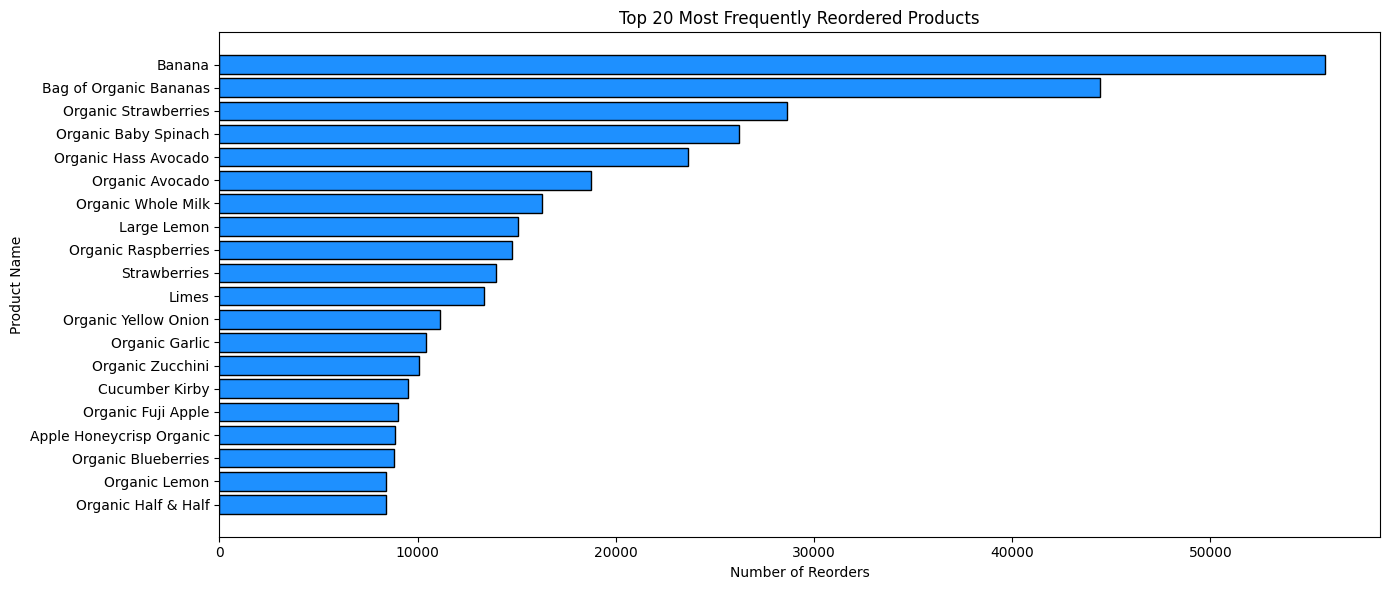

In [65]:
plt.figure(figsize=(14, 6))
plt.barh(top_reordered['product_name'], top_reordered['reorder_count'], color='dodgerblue', edgecolor='black')
plt.title('Top 20 Most Frequently Reordered Products')
plt.xlabel('Number of Reorders')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # Most reordered at the top
plt.tight_layout()
plt.show() 

It looks like produce and dairy comprise the most reordered products as well. It makes sense that perishables would be the most reordered items.

### [C3] For each product, what proportion of its orders are reorders?

To calculate the proportion of orders for each product that are reorders:

1. **Merge the datasets**: Combine `order_products` with the `products` dataset to access product names and IDs in the same DataFrame.
2. **Group the data**: Group by `product_id` and `product_name` to isolate each product's order history.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to compute the proportion of orders for each product that were reorders. The value represents the reorder rate.
4. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to organize the grouped data into a readable DataFrame.
6. **Optional Sorting**: Sort the results by `product_id` or another column for better clarity.

This approach provides insights into how frequently each product is reordered, helping identify customer favorites or staples.


In [66]:
# Merge to get product names with reorder data
merged = order_products.merge(products, on='product_id', how='inner')

In [67]:
# Calculate mean of 'reordered' — this gives the proportion of orders that were reorders
reorder_rate = merged.groupby(['product_id', 'product_name'])['reordered'].mean().reset_index()

# Rename the column for clarity
reorder_rate.rename(columns={'reordered': 'reorder_proportion'}, inplace=True)

In [68]:
# Sort products by reorder proportion (from highest to lowest)
reorder_rate_sorted = reorder_rate.sort_values('reorder_proportion', ascending=False)

# Preview top results
print(reorder_rate_sorted.head(10))

       product_id                                       product_name  \
16218       18121                            Jalapenos With Sea Salt   
24582       27387                         Banana Greek Nonfat Yogurt   
15913       17773                             Quinoa- with Olive Oil   
43954       49063                       Rosemary & Sea Salt Crackers   
13355       14935                           Kombucha Blueberry Basil   
43953       49062  Superior Preference Fade-Defying Color + Shine...   
5320         5924  Pearls Elite Extra Strength Probiotics Dietary...   
37656       42050                   Ultragrain Tortillas 8 Taco Size   
37646       42038                          Scalp Intensive Treatment   
13238       14802                               Black Pepper Chicken   

       reorder_proportion  
16218                 1.0  
24582                 1.0  
15913                 1.0  
43954                 1.0  
13355                 1.0  
43953                 1.0  
5320       

In [69]:
# Count total orders per product
order_counts = merged.groupby('product_id').size().reset_index(name='total_orders')

# Merge with reorder_rate
reorder_summary = reorder_rate.merge(order_counts, on='product_id')

# Filter to products with at least 20 orders
filtered_reorder_summary = reorder_summary[reorder_summary['total_orders'] >= 20] \
    .sort_values('reorder_proportion', ascending=False)

print(reorder_summary)
print(filtered_reorder_summary)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               7                     Pure Coconut Water With Orange   
...           ...                                                ...   
44511       49684          Vodka- Triple Distilled- Twist of Vanilla   
44512       49685                 En Croute Roast Hazelnut Cranberry   
44513       49686                                   Artisan Baguette   
44514       49687         Smartblend Healthy Metabolism Dry Cat Food   
44515       49688                             Fresh Foaming Cleanser   

       reorder_proportion  total_orders  
0                0.564286           280  
1                0.000000            11  
2        

### [C4] For each customer, what proportion of their products ordered are reorders?

To calculate the proportion of products reordered by each customer:

1. **Merge the datasets**: Combine `order_products` with `orders` to link order and customer information.
2. **Group the data**: Group by `user_id` to focus on each customer's ordering behavior.
3. **Calculate the mean of `reordered`**: Use `.mean()` on the `reordered` column to determine the proportion of products reordered by each customer.
4. **Sort the results**: Use `.sort_values(ascending=False)` to identify customers with the highest reorder rates.
5. **Convert to a DataFrame**: Use `.reset_index()` to format the grouped data into a structured DataFrame for further analysis.

This analysis reveals the extent to which individual customers reorder products, providing insights into customer loyalty and preferences.


In [70]:
# Merging order_products with orders
merged_orders = order_products.merge(orders[['order_id', 'user_id']], on='order_id', how='inner')
print(merged_orders)

         order_id  product_id  add_to_cart_order  reordered  user_id
0         2141543       11440                 17          0    58454
1         2141543       31869                 15          1    58454
2         2141543       30233                  9          1    58454
3         2141543       27966                 20          1    58454
4         2141543       13176                  2          1    58454
...           ...         ...                ...        ...      ...
4545002   1790509       43739                  1          1    60894
4545003   1274005       38275                  1          1    32958
4545004    812418       46149                  1          1   130466
4545005   2666881         196                  1          1    33946
4545006   1461911       33198                  1          1    54019

[4545007 rows x 5 columns]


In [71]:
# computing the mean of 'reordered' for each user
user_reorder_rate = merged_orders.groupby('user_id')['reordered'].mean().reset_index()

# renaming the column and mean output
user_reorder_rate.rename(columns={'reordered': 'reorder_proportion'}, inplace=True)
print(user_reorder_rate)

        user_id  reorder_proportion
0             2            0.038462
1             4            0.000000
2             5            0.666667
3             6            0.000000
4             7            0.928571
...         ...                 ...
149621   206203            0.222222
149622   206206            0.714286
149623   206207            0.891304
149624   206208            0.696000
149625   206209            0.320000

[149626 rows x 2 columns]


In [72]:
# Sorting by reorder prooprtion, descending
user_reorder_rate_sorted = user_reorder_rate.sort_values('reorder_proportion', ascending=False).reset_index()

# Display top users
print(user_reorder_rate_sorted.head(10))

    index  user_id  reorder_proportion
0   99672   137587                 1.0
1  125732   173474                 1.0
2   10138    13918                 1.0
3   45067    62300                 1.0
4   45074    62307                 1.0
5   69811    96301                 1.0
6   45076    62312                 1.0
7   35222    48616                 1.0
8   45079    62316                 1.0
9  138633   191162                 1.0


### [C5] What are the top 20 items that people put in their carts first?

To identify the top 20 items that people most frequently add to their carts first:

1. **Merge the datasets**: Combine `order_products` with `products` to link product names and IDs.
2. **Filter the data**: Focus on rows where `add_to_cart_order` equals 1, indicating the first item added to the cart.
3. **Group the data**: Group by `product_id` and `product_name` to aggregate the count of how often each product was the first in a cart.
4. **Count occurrences**: Use `.count()` to calculate the total number of times each product was the first added.
5. **Sort the results**: Use `.sort_values(ascending=False)` to rank products by their first-in-cart frequency.
6. **Display the top 20**: Use `.head(20)` to extract the most popular first-in-cart items.

This provides insights into which products customers prioritize in their shopping process.


In [73]:
# Merge datasets order products and products
merged = order_products.merge(products, on='product_id', how='inner')

In [74]:
# first item added to the cart
first_in_cart = merged[merged['add_to_cart_order'] == 1]

In [75]:
# count how many times each product was first in cart
first_counts = first_in_cart.groupby(['product_id', 'product_name']).size().reset_index(name='first_in_cart_count')

# sort by count in descending order
top_first_products = first_counts.sort_values('first_in_cart_count', ascending=False).head(20)

# displaying the top results
print(top_first_products)

       product_id                 product_name  first_in_cart_count
13265       24852                       Banana                15562
7045        13176       Bag of Organic Bananas                11026
14863       27845           Organic Whole Milk                 4363
11255       21137         Organic Strawberries                 3946
25145       47209         Organic Hass Avocado                 3390
11654       21903         Organic Baby Spinach                 3336
25435       47766              Organic Avocado                 3044
10497       19660                 Spring Water                 2336
8947        16797                 Strawberries                 2308
14937       27966          Organic Raspberries                 2024
23750       44632   Sparkling Water Grapefruit                 1914
26210       49235          Organic Half & Half                 1797
25361       47626                  Large Lemon                 1737
115           196                         Soda  

The products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water. I couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products. I do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types. It could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.

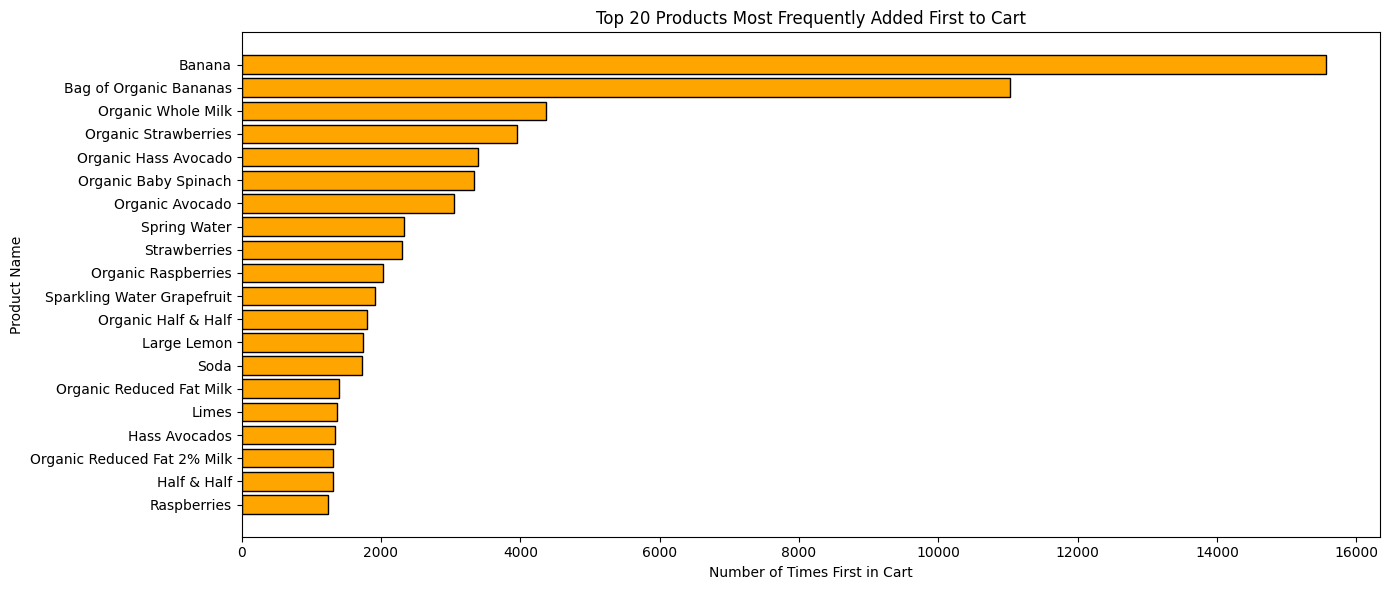

In [76]:
plt.figure(figsize=(14, 6))
plt.barh(top_first_products['product_name'], top_first_products['first_in_cart_count'], color='orange', edgecolor='black')
plt.title('Top 20 Products Most Frequently Added First to Cart')
plt.xlabel('Number of Times First in Cart')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # Put the highest at the top
plt.tight_layout()
plt.show()

In [77]:
# Merge order_products → products → aisles & departments
merged_full = order_products.merge(products, on='product_id', how='inner') \
                            .merge(aisles, on='aisle_id', how='left') \
                            .merge(departments, on='department_id', how='left') \
                            .merge(orders[['order_id', 'user_id', 'order_dow']], on='order_id', how='left')


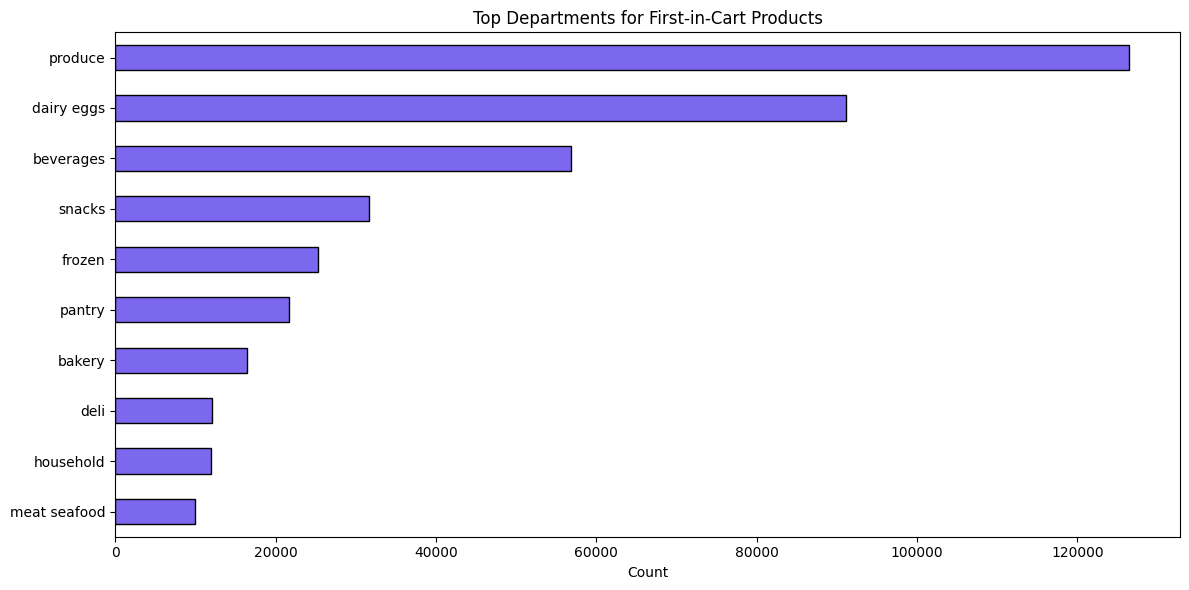

In [78]:
# Focus on first-in-cart
first_cart = merged_full[merged_full['add_to_cart_order'] == 1]

# Group by department or aisle
first_by_dept = first_cart['department'].value_counts().sort_values(ascending=False)
first_by_aisle = first_cart['aisle'].value_counts().sort_values(ascending=False)

# Plot departments
plt.figure(figsize=(12, 6))
first_by_dept.head(10).plot(kind='barh', color='mediumslateblue', edgecolor='black')
plt.title('Top Departments for First-in-Cart Products')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()